In [1]:
#Load packages to be used, pandas, matplotlib.pyplot, seaborn, numpy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

# Start of magic command which configures the execution environment, to display graphics w/in notebook
%matplotlib inline

In [2]:
#Load the dataset needed for data preparation w/ quick snapshot of info

auto_prices = pd.read_csv('Automobile price data _Raw_.csv')
auto_prices.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [4]:
#Recode names
 #Since python doesn't recognize the "-" hyphen character, it is recoded w/ an "_" underscore instead
    #Python is unable to recognize the following special characters as well "-", ",", "*", "/", "|", ">", "<", "@", "!" etc. w/in column names
    
auto_prices.columns = [str.replace('-', '_') for str in auto_prices.columns]

In [3]:
# Find missing values w/in dataset
 # Can be coded as character string, numeric value like -999 or missing value NaN, or a NULL value.
# Then determine how to treat missing values.
 #Remove rows w/ missing values
 #Remove features w/ missing values
 #Impute by replacing values w/ mean or median using simple algorithms, or more complex ones like SMOTE or expectation maximization (EM).
 #Use nearest neighbor, averaging, forward filling or backward filling.

#Shows which features are missing values
(auto_prices.astype(np.object) == '?').any()

symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

In [6]:
#Above- Normalized_losses, num_of_doors, bore, stroke, horsepower, peak_rpm, and price are all missing values.

#Below- Display data types for each feature

auto_prices.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [7]:
#Above - Features noted in previous cell typed as object columns due to use of "?" character for missing value. Some columns should actually be numeric.

#Below- Find out how many values are missing w/in each feature.

for col in auto_prices.columns:
    if auto_prices[col].dtype == object:
        count = 0
        count = [count + 1 for x in auto_prices[col] if x == '?']
        print(col + ' ' + str(sum(count)))
        
auto_prices.shape  #Shape of current data

normalized_losses 41
make 0
fuel_type 0
aspiration 0
num_of_doors 2
body_style 0
drive_wheels 0
engine_location 0
engine_type 0
num_of_cylinders 0
fuel_system 0
bore 4
stroke 4
horsepower 2
peak_rpm 2
price 4


(205, 26)

In [8]:
#Above- Num_of_doors, bore, stroke, horsepower, peak_rpm, &  price all are object column missing values which should be numeric columns.
#Below- Since so many values are missing for normalize_losses, the whole row will be removed.
 # All other missing values will have their rows removed.
    
#Remove(Drop) whole column due to many values being missing
auto_prices.drop('normalized_losses', axis = 1, inplace = True)

#Remove rows w/ missing values as "?" character
cols = ['bore', 'stroke', 'horsepower', 'peak_rpm', 'price']
for column in cols:
    auto_prices.loc[auto_prices[column] == '?', column] = np.nan     #convert "?" values into Pandas Numpy missing values "nan"
    auto_prices.dropna(axis = 0, inplace = True)     #Remove rows with "nan"

auto_prices.shape

(195, 25)

In [9]:
#Above- 10 rows & 1 column has been removed
#Below- Transform data type of feature/column
 #Convert all missing value object columns to numeric if they should be numeric

for column in cols:
    auto_prices[column] = pd.to_numeric(auto_prices[column])
auto_prices[cols].dtypes

bore          float64
stroke        float64
horsepower      int64
peak_rpm        int64
price           int64
dtype: object

In [10]:
#Feature Engineering - Transforming Variables
 #Aggregating categorical variables/features
    
#Get frequency counts for num_of_cylinders feature    
auto_prices['num_of_cylinders'].value_counts()

four      155
six        24
five       10
eight       4
twelve      1
three       1
Name: num_of_cylinders, dtype: int64

In [11]:
#Above- Only one auto for three & twelve cyclinders, & 4 autos w/ eight autos which aren't enough
#Below- Recode categories to aggregate them using dictonary

cylinder_categories = {'three': 'three_four', 'four': 'three_four', 'five': 'five_six', 
                        'six': 'five_six', 'eight':'eight_twelve', 'twelve': 'eight_twelve'}
auto_prices['num_of_cylinders'] = [cylinder_categories[x] for x in auto_prices['num_of_cylinders']]
auto_prices['num_of_cylinders'].value_counts()

three_four      156
five_six         34
eight_twelve      5
Name: num_of_cylinders, dtype: int64

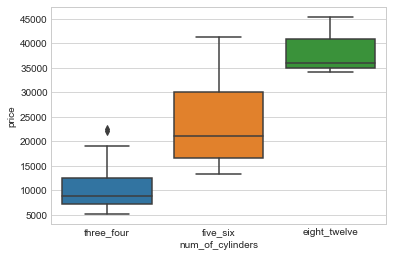

In [12]:
#Above- Aggregated into 3 categories
#Below- Make box plots using seaborn

def plot_box(auto_prices, col, col_y = 'price'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data = auto_prices)
    plt.xlabel(col)  #Label x-axis
    plt.ylabel(col_y)  #Label y-axis
    plt.show()
    
plot_box(auto_prices, 'num_of_cylinders')

In [13]:
#Above- Have three distinct categories to help predict price label
#Below- Get frequency counts for body_style feature

auto_prices['body_style'].value_counts()

sedan          94
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body_style, dtype: int64

In [14]:
#Aggregate together hardtop & convertible using dictonary

body_cats = {'sedan':'sedan', 'hatchback':'hatchback', 'wagon':'wagon',
             'hardtop':'hardtop_convert', 'convertible':'hardtop_convert'}
auto_prices['body_style'] = [body_cats[x] for x in auto_prices['body_style']]
auto_prices['body_style'].value_counts()

sedan              94
hatchback          63
wagon              24
hardtop_convert    14
Name: body_style, dtype: int64

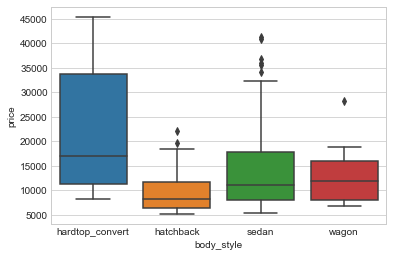

In [15]:
#Above- Aggregated into 4 categories
#Below- Make box plots using seaborn

def plot_box(auto_prices, col, col_y = 'price'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data = auto_prices)
    plt.xlabel(col)  #Label x-axis
    plt.ylabel(col_y)  #Label y-axis
    plt.show()
    
plot_box(auto_prices, 'body_style')

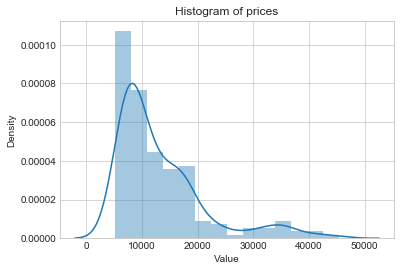

In [16]:
#Above- Have four distinct categories to help predict price label
#Below- Transformation of numeric features to get closer to normal & symmetric
 #can include logarithms, exponential & power transformations
    
#Display current histogram & distribution of price
def hist_plot(vals, lab):
    sns.distplot(vals)  #distribution plot of values
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')   #Label of x-axis
    plt.ylabel('Density')  #Label of y-axis
    
hist_plot(auto_prices['price'], 'prices')


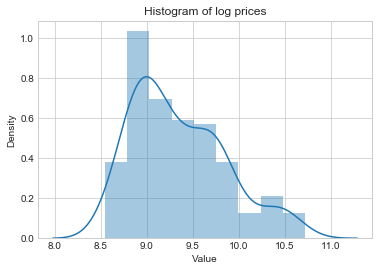

In [17]:
#Above- Distribution is multi-modal left skewed
  #Log transformation can work for skewed data w/out values =<0
    
auto_prices['log_price'] = np.log(auto_prices['price'])
hist_plot(auto_prices['log_price'], 'log prices')

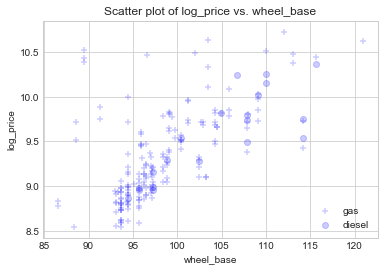

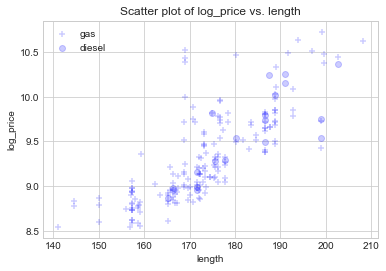

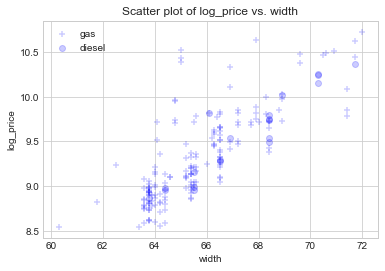

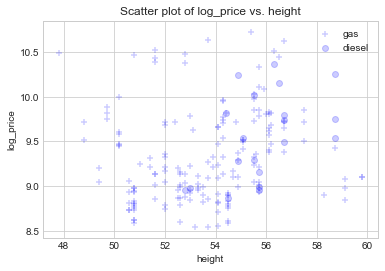

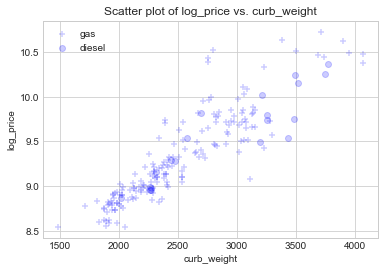

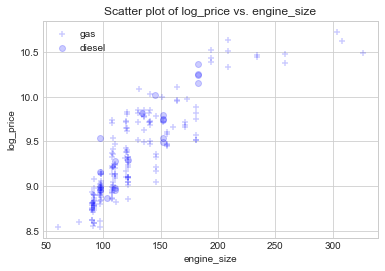

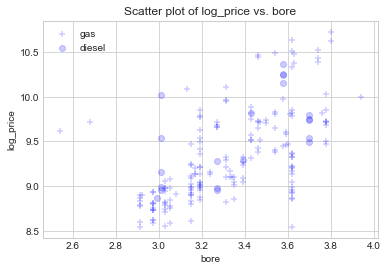

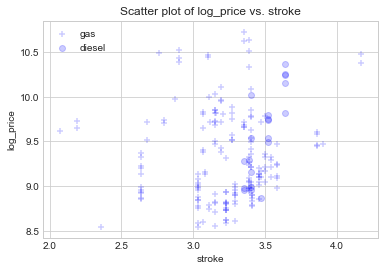

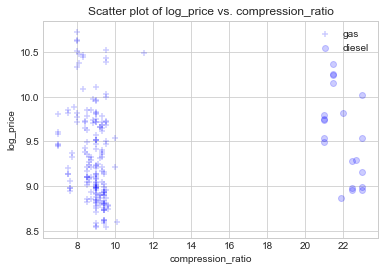

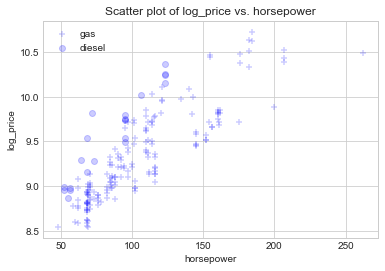

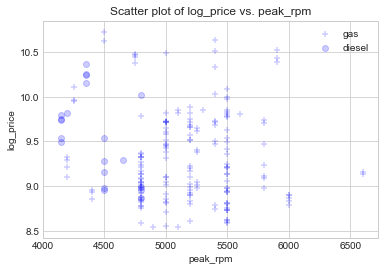

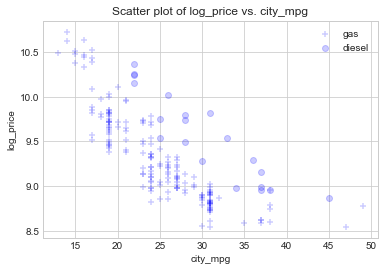

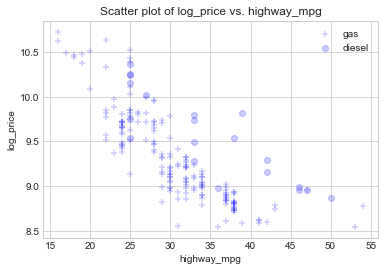

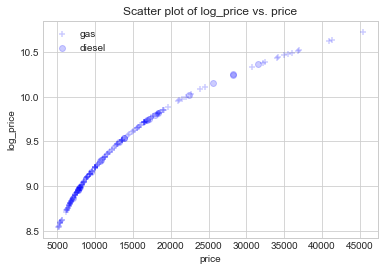

In [18]:
#Above- Distribution looks more symmetric, but still multi-modal and some skew indicated.
 # This is still an improvement over the raw prices
    
#Check how new log transform of label changes relationship w/ numeric features
def plot_scatter_shape(auto_prices, cols, shape_col = 'fuel_type', col_y = 'log_price', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = auto_prices[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = auto_prices[auto_prices[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
            
num_cols = ['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore',
            'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
plot_scatter_shape(auto_prices, num_cols)

In [19]:
#Above- Curb_weight, engine_size, horsepower, city_mpg, & highway_mpg look more linear with log_price than price.   
#Below- Check how new log transform of label changes relationship w/ categorical features
 ##TO-DO##
    #Also check if any features need transformations
      ##TO-DO##
        
#Save this data to a csv
auto_prices.to_csv('Auto_Data_Preped.csv', index = False, header = True)
